In [1]:
from data_utils import DATA_PATH, AUDIO_SAMPLES_PATH, IMAGES_SAMPLES_PATH
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
import os
# save results to result_dir
result_dir = './image_features/'

In [6]:
# pip install pydub

In [7]:
from pydub import AudioSegment

# open the audio file
audio = AudioSegment.from_wav(f'{AUDIO_SAMPLES_PATH}/classical/classical.00003.wav')

# trim the audio file
start_time=0
end_time=30000
audio = audio[start_time:end_time]

# save the trimmed audio file
new_path = '../data/gtzan/genres_trimmed/rock_trimmed.00003.wav'
audio.export(new_path, format='wav')

y, sr = librosa.load(new_path)
y, _ = librosa.effects.trim(y)

In [8]:
from IPython.display import Audio
Audio(data=y, rate=sr)

## RMS

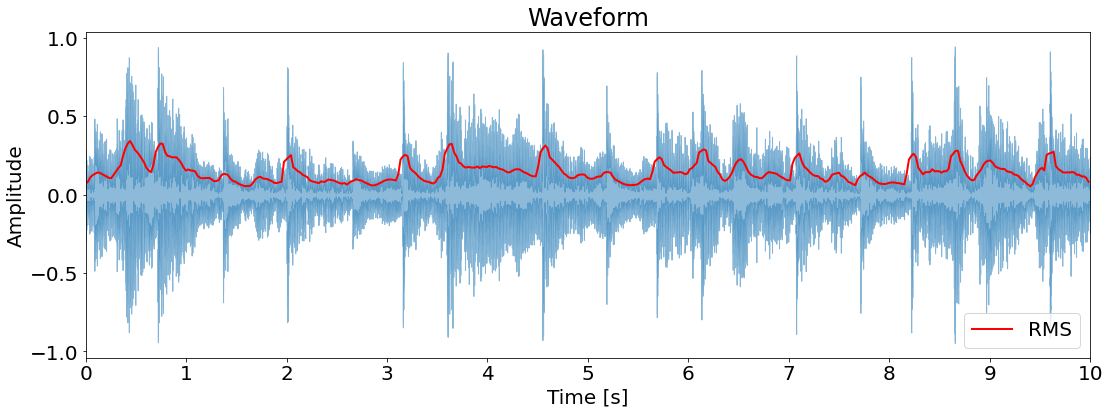

In [209]:
rms = librosa.feature.rms(y=y)
times = librosa.times_like(rms)
fig, ax = plt.subplots(figsize=(18,6))
ax.set(xlim=[0, 10])
plt.rcParams['font.size'] = '20'

ax.plot(times, rms[0], label='RMS', color='r', linewidth=2)
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.',alpha=0.5)

ax.legend(loc='lower right')
ax.set(title='Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
fig.savefig(result_dir+'rms2.png', dpi=200)

## ZERO CROSSING

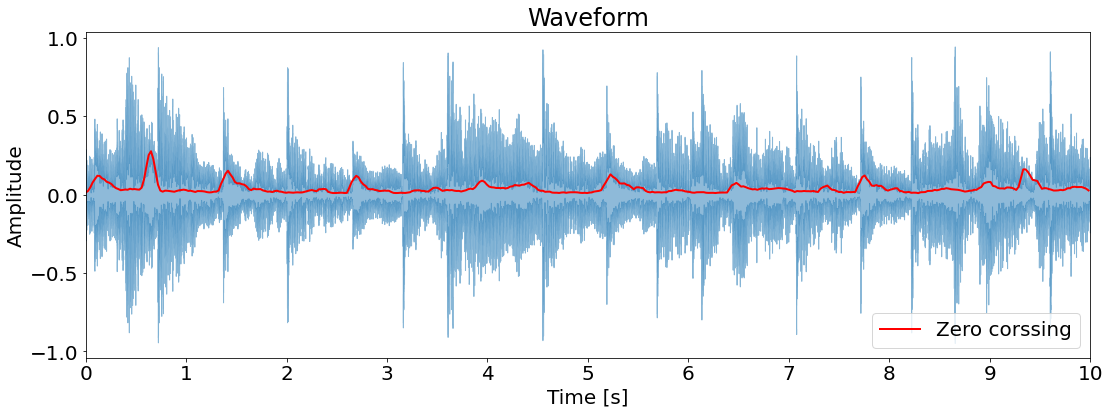

In [210]:
zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)
times = librosa.times_like(zcr)
fig, ax = plt.subplots(figsize=(18,6))

ax.set(xlim=[0, 10])
plt.rcParams['font.size'] = '20'


ax.plot(times, zcr[0], label='Zero corssing', color='r', linewidth=2)
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.',alpha=0.5)
ax.legend(loc='lower right')
ax.set(title='Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

fig.savefig(result_dir+'zero_crossing2.png', dpi=300)

## ROLLOFF

No handles with labels found to put in legend.


Text(0.5, 0, 'Time [s]')

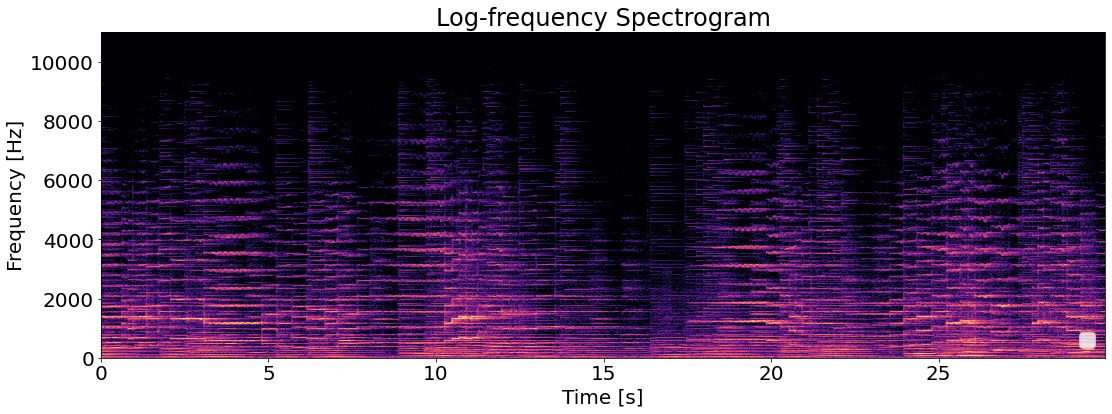

In [10]:
S, phase = librosa.magphase(librosa.stft(y))
rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr, roll_percent=0.85)
times = librosa.times_like(rolloff)

fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams['font.size'] = '20'

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='linear', x_axis='time', ax=ax)
#ax.plot(times, rolloff[0], label='Roll-off frequency (0.85)', color='lawngreen', linewidth=3)

ax.legend(loc='lower right')
ax.set(title='Log-frequency Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

#fig.savefig(result_dir+'rolloff2.png', dpi=200)

Text(0.5, 0, 'Time [s]')

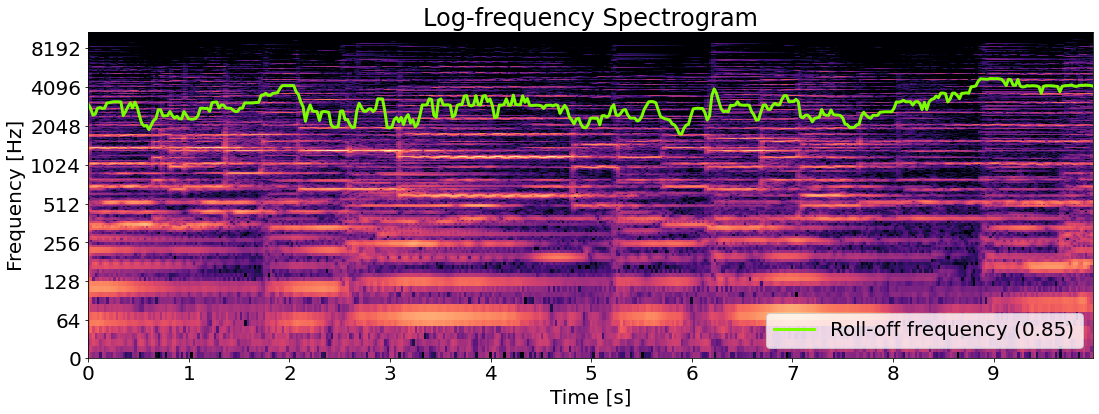

In [6]:
S, phase = librosa.magphase(librosa.stft(y))
rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr, roll_percent=0.85)
times = librosa.times_like(rolloff)

fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams['font.size'] = '20'

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, rolloff[0], label='Roll-off frequency (0.85)', color='lawngreen', linewidth=3)

ax.legend(loc='lower right')
ax.set(title='Log-frequency Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

# fig.savefig(result_dir+'rolloff2.png', dpi=200)

## CENTROID

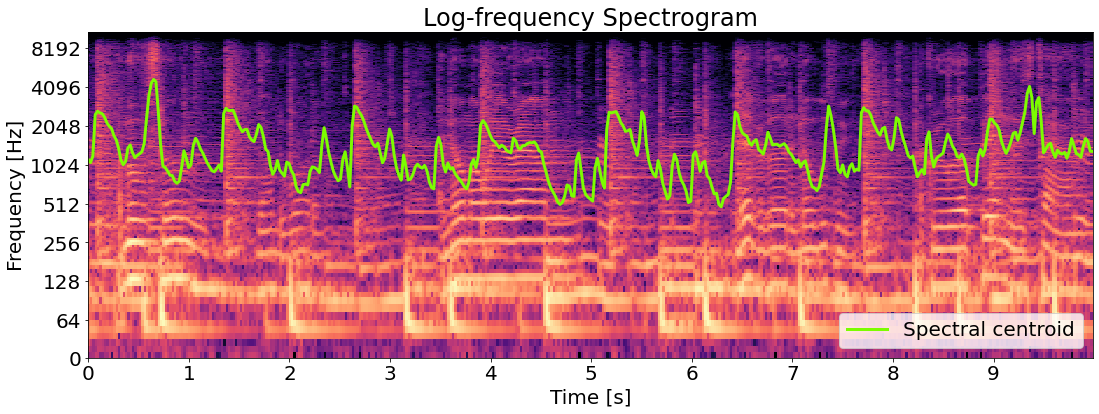

In [212]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)
times = librosa.times_like(cent)

plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots(figsize=(18, 6))

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='lawngreen',linewidth=3)

ax.legend(loc='lower right')
ax.set(title='Log-frequency Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

fig.savefig(result_dir+'centroid2.png', dpi=200)

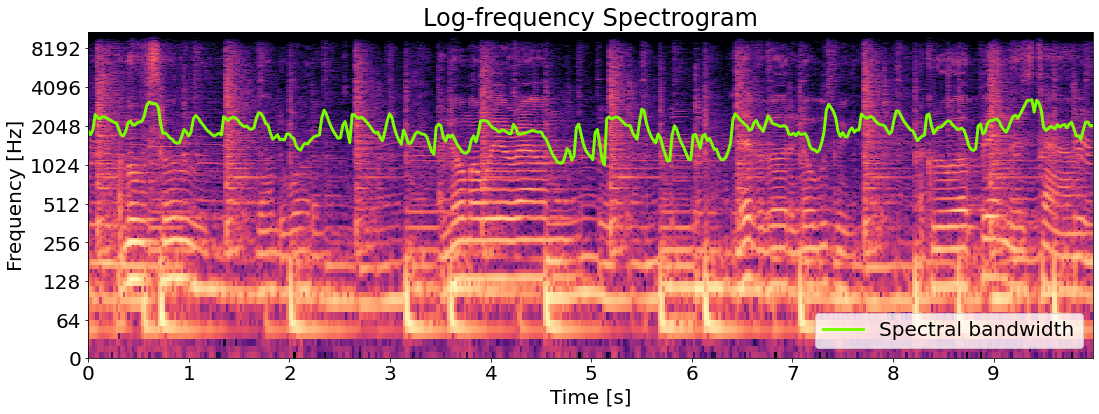

In [213]:
S, phase = librosa.magphase(librosa.stft(y=y))
spec_bw = librosa.feature.spectral_bandwidth(S=S)

times = librosa.times_like(spec_bw)
plt.rcParams['font.size'] = '20'

fig, ax = plt.subplots(figsize=(18, 6))
ax.set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])

ax.semilogy(times, spec_bw[0], label='Spectral bandwidth',color='lawngreen',linewidth=3)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)

ax.legend(loc='lower right')
ax.set(title='Log-frequency Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

fig.savefig(result_dir+'bandwidth2.png', dpi=200)

In [214]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
spec_bw = librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

## MFCC

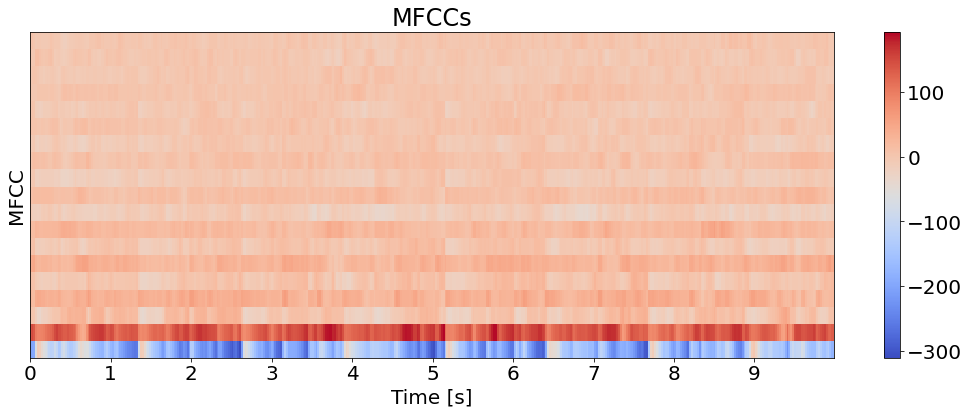

In [215]:

mfccs=librosa.feature.mfcc(y=y, sr=sr)
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
# librosa.feature.mfcc(S=librosa.power_to_db(S))
fig, ax = plt.subplots(figsize=(18, 6))
ax.label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCCs')
plt.ylabel('MFCC')
plt.xlabel('Time [s]')
fig.savefig(result_dir+'mfcc2.png', dpi=200)

## Harmony Percusive


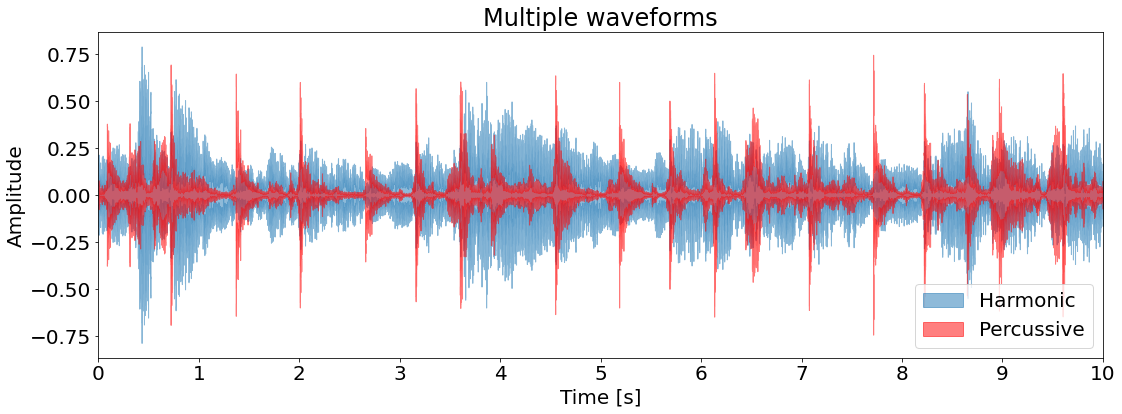

In [216]:
fig, ax = plt.subplots(figsize=(18,6))
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set_xlim(0,10)
ax.legend(loc='lower right')
ax.set(title='Multiple waveforms')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
fig.savefig(result_dir+'harm_perc2.png', dpi=200)